# <center>Analysis of documents published on CGR web site</center>

# I. Data wrangling and exploration

## 1. Import requiered libraries for the analysis

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import and explore the DataFrame

In [20]:
audits_published = pd.read_csv('audits_publi_15_20.csv', index_col=0)
audits_published

,institucion,file_name,url,año,Unidad_auditora,inst_buenas
0,CONACAFE,RIA-CGR-001-15-AFYC-CONACAFE,/index.php/repositorio/send/23-cgr/1977-ria-cg...,2015,Fondos Propios,CONACAFE
1,CiudadSandino,RIA-CGR-002-15-AEES-AM-CiudadSandino,/index.php/repositorio/send/23-cgr/1935-ria-cg...,2015,Fondos Propios,CiudadSandino
2,RubenDario,RIA-CGR-003-15-AEES-TN-RubenDario,/index.php/repositorio/send/23-cgr/5014-ria-cg...,2015,Fondos Propios,RubenDario
3,Acoyapa,RIA-CGR-004-15-AEES-AM-Acoyapa,/index.php/repositorio/send/23-cgr/1919-ria-cg...,2015,Fondos Propios,Acoyapa
4,ElCrucero,RIA-CGR-005-15-AEES-AM-ElCrucero,/index.php/repositorio/send/23-cgr/1926-ria-cg...,2015,Fondos Propios,ElCrucero
...,...,...,...,...,...,...
5814,ElCrucero,RIA-UAI-927-2020-ACUM-AM-ElCrucero,/index.php/repositorio/send/113-uai/11866-ria-...,2020,Auditoría interna,ElCrucero
5815,CiudadSandino,RIA-UAI-928-2020-ACUM-AM-CiudadSandino,/index.php/repositorio/send/113-uai/11865-ria-...,2020,Auditoría interna,CiudadSandino
5816,CiudadSandino,RIA-UAI-929-2020-ACUM-AM-CiudadSandino,/index.php/repositorio/send/113-uai/11864-ria-...,2020,Auditoría interna,CiudadSandino
5817,Matagalpa,RIA-UAI-930-2020-ACUM-AM-Matagalpa,/index.php/repositorio/send/113-uai/11863-ria-...,2020,Auditoría interna,Matagalpa


### For this dataframe i will drop the first column because is the same as the last one "inst_buenas", since this is a column cleaned

In [21]:
audits_published.drop('institucion', axis=1, inplace=True)
audits_published.rename(columns={'inst_buenas':'Institucion'}, inplace=True)
audits_published

,file_name,url,año,Unidad_auditora,Institucion
0,RIA-CGR-001-15-AFYC-CONACAFE,/index.php/repositorio/send/23-cgr/1977-ria-cg...,2015,Fondos Propios,CONACAFE
1,RIA-CGR-002-15-AEES-AM-CiudadSandino,/index.php/repositorio/send/23-cgr/1935-ria-cg...,2015,Fondos Propios,CiudadSandino
2,RIA-CGR-003-15-AEES-TN-RubenDario,/index.php/repositorio/send/23-cgr/5014-ria-cg...,2015,Fondos Propios,RubenDario
3,RIA-CGR-004-15-AEES-AM-Acoyapa,/index.php/repositorio/send/23-cgr/1919-ria-cg...,2015,Fondos Propios,Acoyapa
4,RIA-CGR-005-15-AEES-AM-ElCrucero,/index.php/repositorio/send/23-cgr/1926-ria-cg...,2015,Fondos Propios,ElCrucero
...,...,...,...,...,...
5814,RIA-UAI-927-2020-ACUM-AM-ElCrucero,/index.php/repositorio/send/113-uai/11866-ria-...,2020,Auditoría interna,ElCrucero
5815,RIA-UAI-928-2020-ACUM-AM-CiudadSandino,/index.php/repositorio/send/113-uai/11865-ria-...,2020,Auditoría interna,CiudadSandino
5816,RIA-UAI-929-2020-ACUM-AM-CiudadSandino,/index.php/repositorio/send/113-uai/11864-ria-...,2020,Auditoría interna,CiudadSandino
5817,RIA-UAI-930-2020-ACUM-AM-Matagalpa,/index.php/repositorio/send/113-uai/11863-ria-...,2020,Auditoría interna,Matagalpa


In [22]:
audits_published.shape

(5819, 5)

### So, this dataframe has 5,819 rows and 5 columns

In [ ]:
## 

### Now, i want to know the data types of the dataframe

In [23]:
audits_published.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 0 to 5818
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        5819 non-null   object
 1   url              5819 non-null   object
 2   año              5819 non-null   int64 
 3   Unidad_auditora  5819 non-null   object
 4   Institucion      5819 non-null   object
dtypes: int64(1), object(4)
memory usage: 272.8+ KB


### As it shown above, only 'año' is an 'int' dtype, the rest were read as objects. We are going to change them to string

In [24]:
cols = ['file_name','url','Unidad_auditora','Institucion']
audits_published[cols]=audits_published[cols].astype('string')
audits_published.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 0 to 5818
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        5819 non-null   string
 1   url              5819 non-null   string
 2   año              5819 non-null   int64 
 3   Unidad_auditora  5819 non-null   string
 4   Institucion      5819 non-null   string
dtypes: int64(1), string(4)
memory usage: 272.8 KB


## 3. Explore the data

### Since all the columns are string variables (except 'año'), we will get a description for these variables

In [27]:
audits_published.describe(include='string')

,file_name,url,Unidad_auditora,Institucion
count,5819,5819,5819,5819
unique,5819,5819,3,302
top,RIA-CGR-001-15-AFYC-CONACAFE,/index.php/repositorio/send/23-cgr/1977-ria-cg...,Auditoría interna,MINED
freq,1,1,4827,281


As it is shown above, the dataframe has **5,819** records that counts as unique file, what represents the total numbers of audits reports published between the years substracted from the web.

The column 'Unidad_auditora' represent the audit unit that was in charge for the audit report. In this case we have 3 unique values; besides, the most frequent value found is 'Auditoría interna', which is the unit that made the highest number of audit reports.

For the column 'Institucion', theres are **302** differents records; the most frequent is 'MINED' which has 281 audits reports.

### The next thing to know is how many were published each year.

### In order to do that a dataframe will be created grouped by "unidad_auditora" and "año" with the count/size

In [61]:
auditsbyinst= audits_published[['Unidad_auditora','año']].groupby(['año','Unidad_auditora']).size().reset_index()
auditsbyinst.rename(columns={0:'freq'},inplace=True)
auditsbyinst

,año,Unidad_auditora,freq
0,2015,Auditoría interna,1319
1,2015,Fondos Propios,214
2,2016,Auditoría interna,1189
3,2016,Firmas privadas,11
4,2016,Fondos Propios,191
5,2017,Auditoría interna,497
6,2017,Firmas privadas,15
7,2017,Fondos Propios,165
8,2018,Auditoría interna,549
9,2018,Firmas privadas,12


In [64]:
auditsbyinst['%_año'] = (100 * auditsbyinst['freq'] / auditsbyinst.groupby('año')['freq'].transform('sum')).round(2)
auditsbyinst

,año,Unidad_auditora,freq,%_año
0,2015,Auditoría interna,1319,86.04
1,2015,Fondos Propios,214,13.96
2,2016,Auditoría interna,1189,85.48
3,2016,Firmas privadas,11,0.79
4,2016,Fondos Propios,191,13.73
5,2017,Auditoría interna,497,73.41
6,2017,Firmas privadas,15,2.22
7,2017,Fondos Propios,165,24.37
8,2018,Auditoría interna,549,78.65
9,2018,Firmas privadas,12,1.72


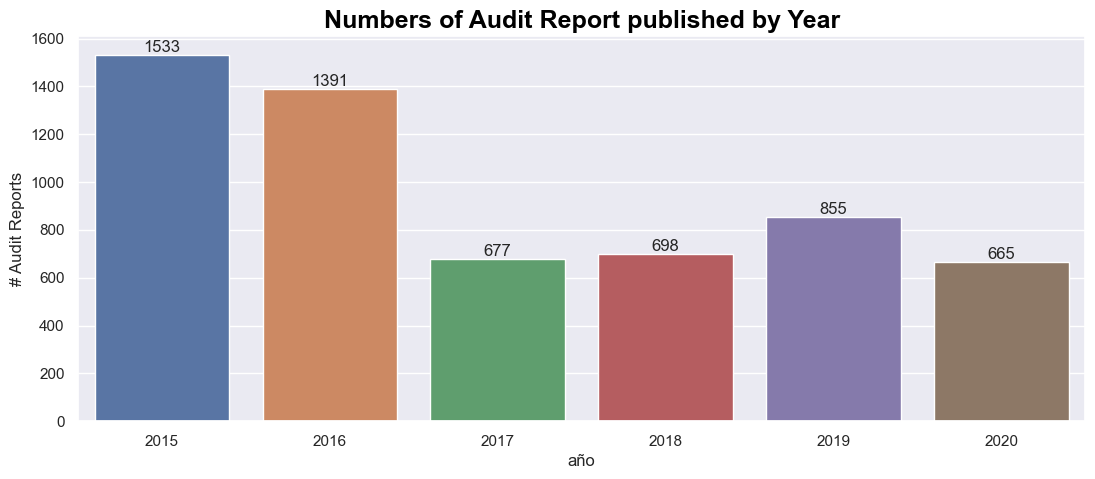

In [101]:
sns.set(rc={"figure.figsize":(13, 5)})

ax = sns.barplot(data=auditsbyinst, x='año', y='freq', estimator='sum', errorbar=None)
ax.set_title('Numbers of Audit Report published by Year', 
             fontdict={'fontsize':18, 'fontweight':'bold'}, color='black')
ax.set_ylabel("# Audit Reports")

for container in ax.containers:
    ax.bar_label(container)


As is shown above, 2015 is the year with higher numbers of publications with **1,533**. After that point we see a decreasing in this number up to **665** in 2020

### How many audit reports per year by Audit Unit?

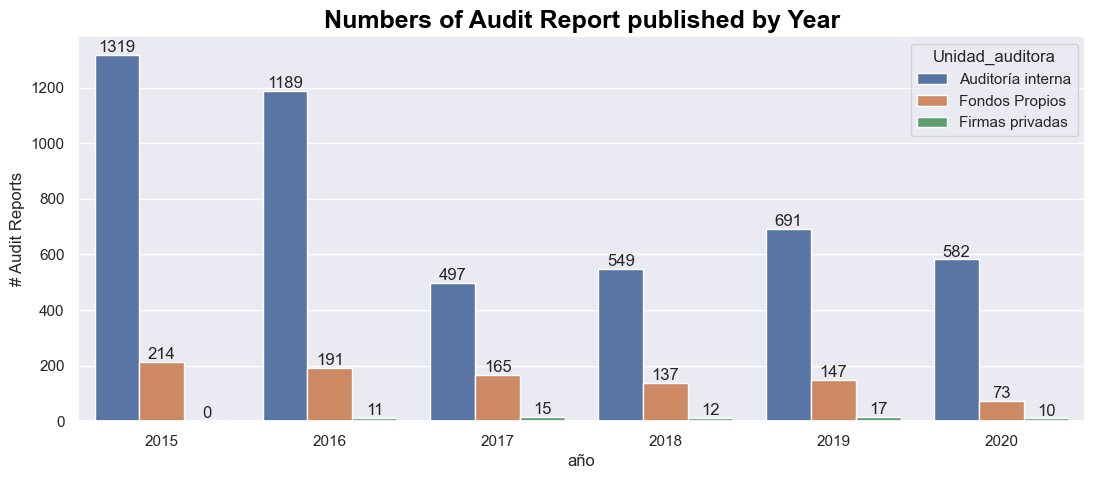

In [102]:
ax = sns.barplot(data=auditsbyinst, x='año', y='freq', hue='Unidad_auditora', 
                 estimator='sum', errorbar=None, 
                 hue_order=['Auditoría interna','Fondos Propios','Firmas privadas'])
ax.set_title('Numbers of Audit Report published by Year',
            fontdict={'fontsize':18, 'fontweight':'bold'}, color='black')
ax.set_ylabel("# Audit Reports")

for container in ax.containers:
    ax.bar_label(container)


### I want to see the same distribution seen above, but this time with the percent.

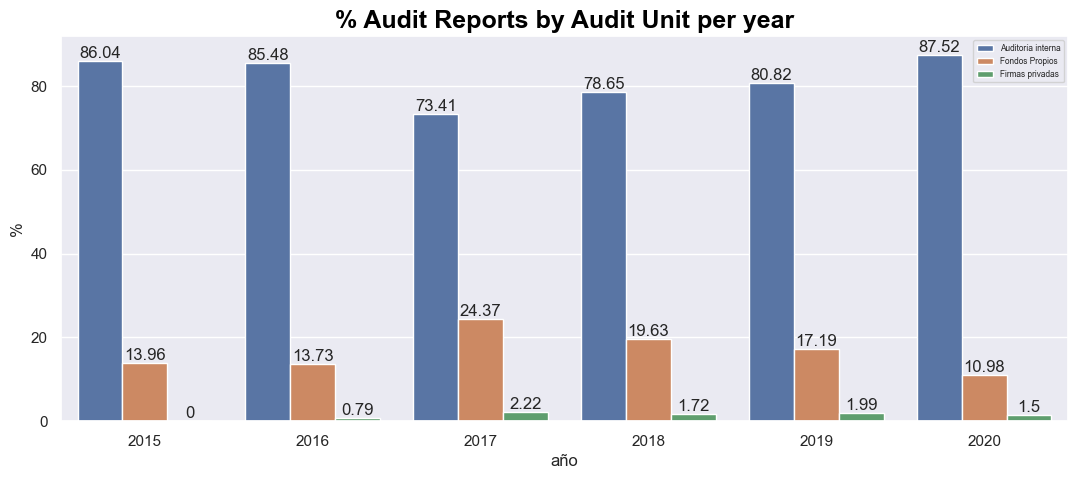

In [103]:
ax = sns.barplot(data=auditsbyinst, x='año', y='%_año', hue='Unidad_auditora', 
                 estimator='sum', errorbar=None, 
                 hue_order=['Auditoría interna','Fondos Propios','Firmas privadas'])
ax.set_title('% Audit Reports by Audit Unit per year',
            fontdict={'fontsize':18, 'fontweight':'bold'}, color='black')
ax.set_ylabel("%")

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(loc='upper right', prop={'size': 6})

In [79]:
auditsbyinst.groupby('Unidad_auditora')['%_año'].mean().round(2)

Unidad_auditora
Auditoría interna    81.99
Firmas privadas       1.64
Fondos Propios       16.64
Name: %_año, dtype: float64

As we could see, the vast majority of the audits report were made by the 'Auditoría interna' unit **(81.99% as average each year)**. In second place is the audit unit called 'Fondos Propios'

### The next graph show the distribution of the audit reports by audit unit for all the period 2015-2020

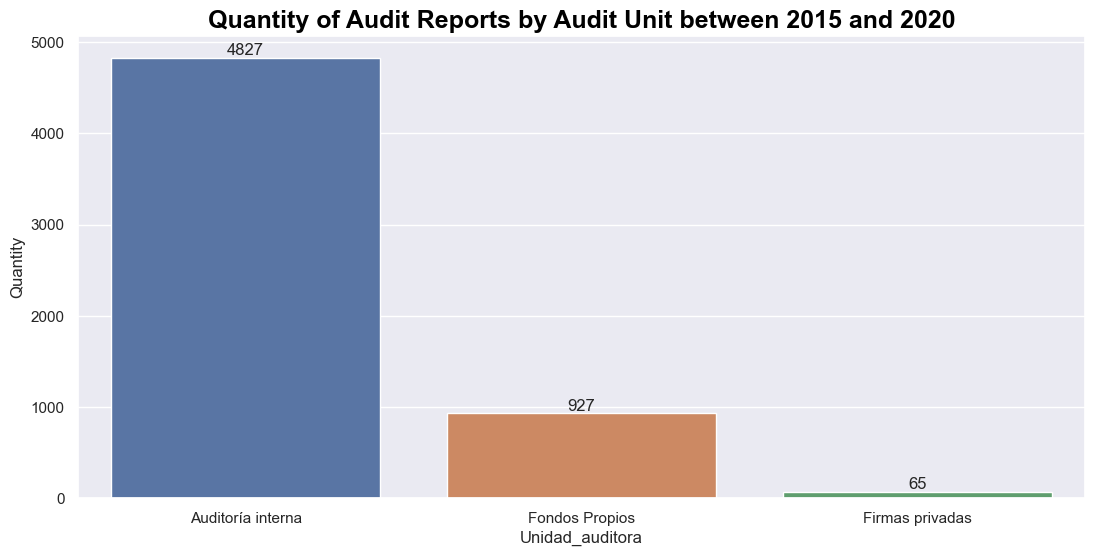

In [92]:
sns.set(rc={"figure.figsize":(13, 6)})

ax = sns.barplot(data=auditsbyinst, x='Unidad_auditora', y='freq',
                 order=auditsbyinst['Unidad_auditora'].value_counts().index, errorbar=None,estimator=sum )
ax.set_title('Quantity of Audit Reports by Audit Unit between 2015 and 2020', 
             fontdict={'fontsize':18, 'fontweight':'bold'}, color='black')
ax.set_ylabel("Quantity")
for container in ax.containers:
    ax.bar_label(container)


### TOP TEN INSTITUTIONS MOST AUDITED

In [94]:
top_10_instit = audits_published['Institucion'].value_counts().head(10).reset_index()
top_10_instit

,index,Institucion
0,MINED,281
1,INSS,208
2,EPN,196
3,Managua,178
4,MIGOB,165
5,MHCP,146
6,MTI,143
7,MINSA,123
8,ENACAL,117
9,MIFAM,106


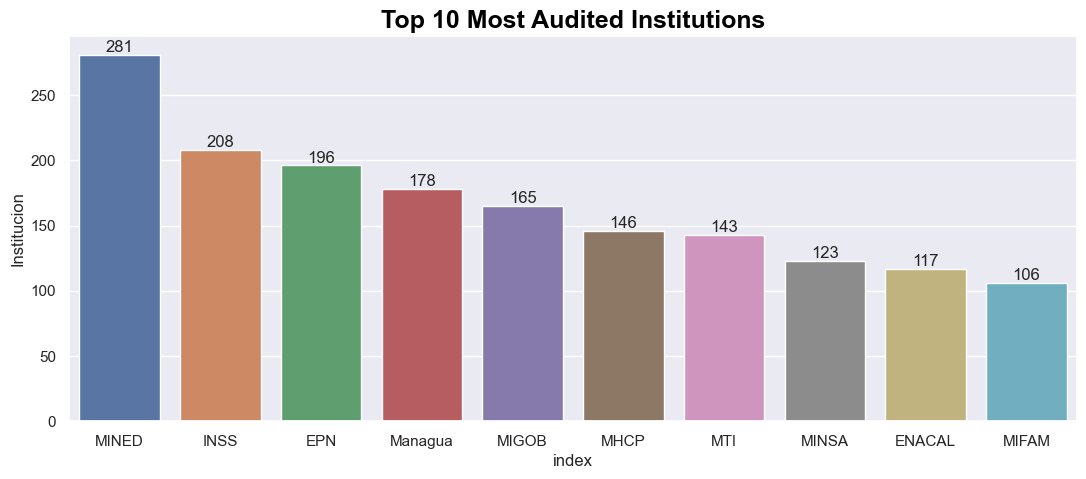

In [105]:
ay=sns.barplot(data=top_10_instit, x='index', y='Institucion')
ay.set_title('Top 10 Most Audited Institutions',
            fontdict={'fontsize':18, 'fontweight':'bold'}, color='black')
for container in ay.containers:
    ay.bar_label(container)